In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

#import stopwords and tokenize from NLTK
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import OrderedDict

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
data = pd.read_csv("/Users/united/Desktop/Britto/driver group data/Score_xtract.csv")

In [3]:
English_Data = data[data.Q_LANGUAGE == "EN"]
English_Data = English_Data.dropna(subset=['VERBATIM_EN'])

sid = SentimentIntensityAnalyzer()

se = [] #Empty array

sentValue = []

for index, row in English_Data.iterrows():
    
    reviewSentence = str(row["VERBATIM_EN"]) #selecting comments from each row
    
    reviewSentence = re.sub('[^ a-zA-Z]', '', reviewSentence) #Removing special characters form the sentence
    
    ss = sid.polarity_scores(reviewSentence)
    
    #defining the result of each description
    sentiment = ""
    
    value = ""
    
    if ss['compound'] == 0:
        sentiment = "Neutral"
        value = ss['compound']
        
    elif ss['compound'] > 0:
        sentiment = "Positive"
        value = ss['compound']
    
    else:
        sentiment = "Negative"
        value = ss['compound']
    
    #adding values into array
    se.append(sentiment)
    sentValue.append(value)
    
English_Data['Sentiment'] = se
English_Data['SentimentValue'] = sentValue

sentiment_result = ""
for i in range(0,len(se)):
    sentiment_result = sentiment_result + se[i] +"','"

sentiment_result = "'"+sentiment_result[0:len(sentiment_result)-2]
stringResult = str(sentiment_result)
stringResult = stringResult.replace("'","") 
stringResult = stringResult.replace(","," ")

In [4]:
def listToString(list):
    stringResult = str(list)
    stringResult = stringResult.replace("'","") 
    stringResult = stringResult.replace(","," ")
    stringResult = stringResult.replace("[","")
    stringResult = stringResult.replace("]","")
    return stringResult

#Counting the words frequency
import builtins

def wordsFrequncy(str):
    counts = builtins.dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

In [5]:
# library
import matplotlib.pyplot as plt
 
# create data
names = wordsFrequncy(stringResult).keys()
size = wordsFrequncy(stringResult).values()

# Create a circle for the center of the plot
my_circle=plt.Circle( (0.4,0.3), 0.8, color='white')

Neutral = English_Data[English_Data.Sentiment == "Neutral"]

Negative = English_Data[English_Data.Sentiment == "Negative"]

Positive = English_Data[English_Data.Sentiment == "Positive"]

Neu_Men = Neutral[Neutral.GENDER == "M"]
Neu_Men = Neu_Men['GENDER']
Neu_Men_length = len(Neu_Men.reset_index(drop=True))

Neu_Female = Neutral[Neutral.GENDER == "F"]
Neu_Female = Neu_Female['GENDER']
Neu_Female_length = len(Neu_Female.reset_index(drop=True))

Neg_Men = Negative[Negative.GENDER == "M"]
Neg_Men = Neg_Men['GENDER']
Neg_Men_length = len(Neg_Men.reset_index(drop=True))

Neg_Female = Negative[Negative.GENDER == "F"]
Neg_Female = Neg_Female['GENDER']
Neg_Female_length = len(Neg_Female.reset_index(drop=True))

Pos_Men = Positive[Positive.GENDER == "M"]
Pos_Men = Pos_Men['GENDER']
Pos_Men_length = len(Pos_Men.reset_index(drop=True))

Pos_Female = Positive[Positive.GENDER == "F"]
Pos_Female = Pos_Female['GENDER']
Pos_Female_length = len(Pos_Female.reset_index(drop=True))

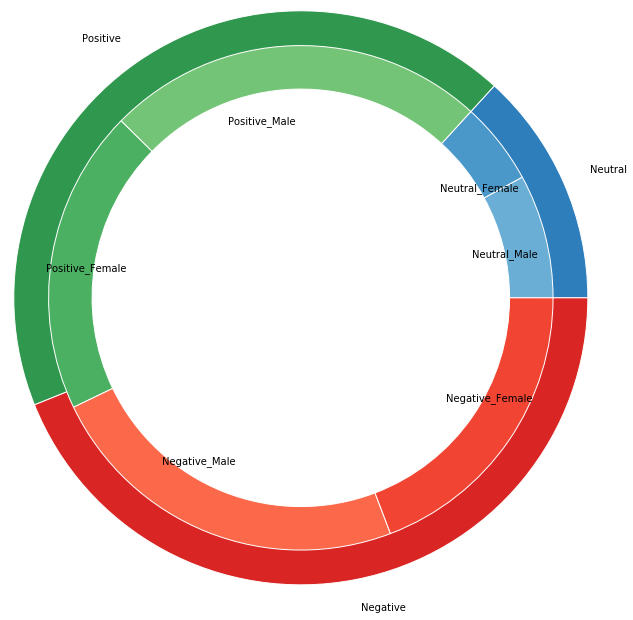

,Neutral_Male,Neutral_Female,Positive_Male,Positive_Female,Negative_Male,Negative_Female
0,2306,1534,7084,5667,6864,5579


In [6]:
# Libraries
import matplotlib.pyplot as plt

group_names = wordsFrequncy(stringResult).keys()
group_size = wordsFrequncy(stringResult).values()

subgroup_names=['Neutral_Male', 'Neutral_Female','Positive_Male', 'Positive_Female','Negative_Male', 'Negative_Female']
subgroup_size=[Neu_Men_length,Neu_Female_length,Neg_Men_length,Neg_Female_length,Pos_Men_length,Pos_Female_length]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Greens, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3.3, labels=group_names, colors=[a(0.7), b(0.7), c(0.7)] )
plt.setp( mypie, width=0.6, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=3.3-0.4, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.6), b(0.5), b(0.6), c(0.5), c(0.6)])
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

#Create DataFrame
gender = [subgroup_size]
genderCount = pd.DataFrame(gender)
genderCount.columns = subgroup_names
genderCount

In [7]:
class NegativeWordCloud:
    def __init__(self, df, column, origin, destination, targetName, text):
        self.df = df
        self.column = column
        self.origin = origin
        self.destination = destination
        self.targetName = targetName
        self.text = text
        
    def readRowFromDF(dataframe,column):
        count = ""
        for index, row in dataframe.iterrows():
            count = count + str(row[column]) +" "
        return count

    #Counting the Overall Rating
    def readRow(dataframe,column):
        count = " "
        samp = dataframe[column]
        samp = samp.values.tolist()
        count = count.join(samp)
        return count        
    
    #Text Mining from Dataframe
    def textMining(text, targetName):
        
        negativeCommentsResults = mostNegativeDF[mostNegativeDF['VERBATIM_EN'].str.contains(text)]
        
        negativeCommentsResults = negativeCommentsResults.reset_index()

        negativeCommentsResults = negativeCommentsResults.drop(['level_0','MPLEVEL', 'RESP_GRP', 'MMILER','MILEAGEPLUS','ORIGIN_COUNTRY_CODE','ORIGIN_ST_CODE','DEST_COUNTRY_CODE','DEST_ST_CODE','ACTUAL_ARRIVAL_DATETIME','ACTUAL_DEPARTURE_DATETIME','SCHEDULE_ARRIVAL_DATETIME',
                                                                'SCHEDULE_DEPARTURE_DATETIME','ARRIVAL_DELAY_MIN','DEPARTURE_DELAY_MINS','DELAY_CODE','DELAY_TYPE','DELAY_CD_DSCR','DEPARTURE_GATE','CABIN_CLASS','CARRIER','EQUIP_CODE','EQUIP_TYPE',
                                                                'FLEET_GROUP','FLEET_TYPE_DESC','FLEET_USAGE','RECORD_LOCATOR','SCHEDULE_MILES','SCH_BLK_MIN','SEATNBR','TAIL_NBR','GH_GATE','GH_LOBBY','GH_RAMP','MEDIA_EQUIP','SURVEYED_LEG_ID','TOTAL_FLIGHT_LEG',
                                                                'CHKD_BAG_IND','CABIN_TYPE','Q_LANGUAGE','SSR','TOTAL_DURATION','SURVEY_TYPE_DESC','LANG','ONBOARD|PRIMARY|INFLIGHT ENTERTAINMENT|E_PO_AVAIL_SAT',
                                                                'ONBOARD|PRIMARY|INFLIGHT ENTERTAINMENT|E_DIRECTV_EN_SAT','ONBOARD|PRIMARY|WI-FI|E_WIFI_SAT', 'ONBOARD|PRIMARY|INFLIGHT ENTERTAINMENT|E_PDE_EN_SAT',
                                                                'ONBOARD|PRIMARY|INFLIGHT ENTERTAINMENT|E_MAIN_SCR_EN_SAT', 'AIRPORT|PRIMARY|BAGGAGE|EXP_BAGGAGE','AIRPORT|PRIMARY|GATE|EXP_GATE',
                                                                'AIRCRAFT|PRIMARY|CABIN COMFORT|CCE_SEAT_AREA', 'EXCLUDE FROM AIRPORT|PRIMARY|CONNECTION|AIRPORT_EXP_DISTANCE_SAT',
                                                                 'EXCLUDE FROM AIRPORT|PRIMARY|CONNECTION|AIRPORT_EXP_TIME_SAT', 'EXCLUDE FROM AIRPORT|PRIMARY|CONNECTION|AIRPORT_EXP_SIGN_SAT',
                                                                 'IRROPS-IRROPS_DH_EXP_SAT', 'AIRCRAFT|PRIMARY|CABIN CLEANLINESS|CCE_SMTHG_DIRTY', 'ONBOARD|PRIMARY|FOOD & BEVERAGE|OBE_FOOD_BEVER',
                                                                 'AIRPORT|PRIMARY|SECURITY|EXP_TSA', 'AIRCRAFT|PRIMARY|CABIN APPEARANCE|CCE_SMTHG_POOR_CONDITION', 'AIRPORT|PRIMARY|CHECK-IN|EXP_CHECK_IN',
                                                                 'ONBOARD|PRIMARY|INFLIGHT SERVICE|OBE_FA', 'AIRPORT|PRIMARY|CLUB|EXP_LOUNGE', 'NOT FOR REPORTING|PRIMARY|NET PROMOTER SCORE|RECOMMEND',
                                                                 'AIRCRAFT|PRIMARY|WORKABILITY|ONBORD_WORKING_YN', 'ONBOARD|PRIMARY|INFLIGHT ENTERTAINMENT|SEATBACK_SCREEN_SAT',
                                                                 'ONBOARD|PRIMARY|INFLIGHT ENTERTAINMENT|SEATBACK_SCREEN_LOOP_SAT','|PRIMARY|FLIGHT ATTENDANT|FA_RECOGNIZE','GENDER',
                                                               'DOCUMENT_ID','TITLE','FIRST_NAME','LAST_NAME','index','Sentiment'], axis =1)

        negativeCommentsResults = negativeCommentsResults.rename(index=str, columns={"VERBATIM_EN":"COMMENTS","SentimentValue":"SENTIMENT_VALUE", "FLIGHTNUMBER":"FLIGHT_NUMBER", "OVERALL SATISFACTION|PRIMARY|OVERALL SATISFACTION|SAT_SCORE": "OVERALL_SATISFACTION_SCORE", "|PRIMARY|NET PROMOTER SCORE NEW (1-10)|RECOMMEND1_10": "NET_PROMOTER_SCORE"})

        negativeCommentsResults = negativeCommentsResults.reset_index()
        
        #negativeCommentsResults = negativeCommentsResults.drop(['Index'], axis = 1)
        
        return negativeCommentsResults
    
    def wordProcessing(paragraph):
        
        comments = paragraph.lower()
        comments = re.sub('[^ a-zA-Z]', '', comments)
        stoplist = stopwords.words('english')
        additional_stopwords = """many one 1 moved should grandparent ln tk kept get us next im put row good still flights due bad said like didnt got also another never worst ugly hour minutes told tell even would plane flights aircraft united could take day go poor make wait fly flew way one two three four five may might mightnot"""
        stoplist += additional_stopwords.split()
        lemmatizer = WordNetLemmatizer()
        splitWords = [word for word in comments.split() if word not in stoplist]

        return splitWords

    def listOfKeyWords(df, column, origin, destination):

        negativeCommentsDf = df[df['ORIGIN_AIRPORT'] == origin]
        negativeCommentsDf = df[df['DEST_AIRPORT'] == destination]
        negativeComments = readRowFromDF(negativeCommentsDf,column)
        negativeWords = NegativeWordCloud.wordProcessing(negativeComments)
        
        return negativeWords

In [8]:
x = NegativeWordCloud

In [10]:
mostNegativeDF = English_Data[English_Data['SentimentValue'] <= (-0.5)]
mostNegativeDF = mostNegativeDF.reset_index()

negativeComments = x.readRowFromDF(mostNegativeDF,"VERBATIM_EN")

#Store negative comments in text file
negativeComments = negativeComments.lower()
negativeComments = re.sub('[^ a-zA-Z]', '', negativeComments)

negativeComments = x.readRowFromDF(mostNegativeDF,"VERBATIM_EN")

clean = x.wordProcessing(negativeComments)

#For getting sentiment oputput from array
clean_result = ""
for i in range(0,len(clean)):
    clean_result = clean_result + clean[i] +"','"

clean_result = "'"+clean_result[0:len(clean_result)-2]

cleanResult = listToString(clean_result)

#Word Frequency for Sentiment Results
Keywords = wordsFrequncy(str(cleanResult))

counts = builtins.dict()
words = cleanResult.split()

for word in words:
    if word in counts:
         counts[word] += 1
    else:
         counts[word] = 1

Keywords = OrderedDict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

#Extracting the values from Ordered Dict
mostFrequentWordsValues = []
mostFrequentWordskeys = []

for key,value in Keywords.items():
    mostFrequentWordskeys.append(key)
    mostFrequentWordsValues.append(value)

#Creating Dataframe
frequentWords = [('FrequentWords',mostFrequentWordskeys),
                 ('Frequency',mostFrequentWordsValues)]

frequentWords = pd.DataFrame.from_items(frequentWords)

#The previous and the following codes are same
#Getting the dict keys as a string
text = " "
mostFrequentWords = []
for key in Keywords:
    text = text + key + " "
    mostFrequentWords.append(key)

In [11]:
#ploting functions
def dynamic_bar_plot(keys, values, fig_size_x, fig_size_y, title, x_label, y_label, targetName):
    
    freq_series = pd.Series.from_array(values)

    # Plot the figure.
    plt.figure(figsize=(fig_size_x, fig_size_y))
    ax = freq_series.plot(kind='bar')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(keys)

    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

    plt.savefig(targetName)

def wordCloud(text):
    # Load the image (http://python-graph-gallery.com/wp-content/uploads/wave.jpg)
    wave_mask = np.array(Image.open("wave.jpg"))
 
    # Make the figure
    wordcloud = WordCloud(background_color="MintCream", mask=wave_mask).generate(text)
    plt.figure(figsize=(10,20))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()
    plt.savefig("wordCloud.png")
    
    return plt

def ploting_chart(data, color, label):
    # set width of bar
    barWidth = 0.5
    # set height of bar
    bars1 = list(data.values())
    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    # Make the plot
    plt.bar(r1, bars1, color=color, width=barWidth, edgecolor='white', label=label)
    # Add xticks on the middle of the group bars
    plt.xlabel(label, fontweight='bold')
    plt.xticks(range(len(bars1)), list(data.keys()))
    # Create legend & Show graphic
    plt.legend()
    plt.show()

<h1>Text Mining and Keyword Visualization</h1>

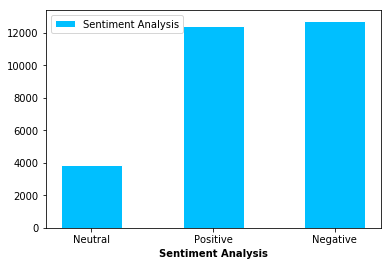

In [12]:
#User Rating
ploting_chart(wordsFrequncy(stringResult), '#00bfff', 'Sentiment Analysis')

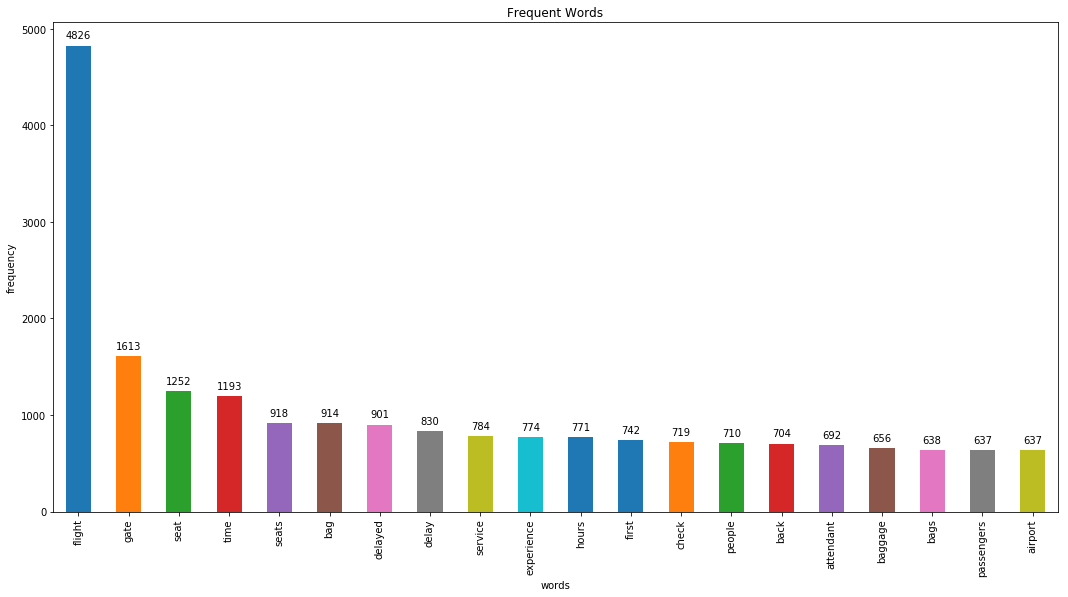

In [13]:
#Frequent Words plot
dynamic_bar_plot(mostFrequentWords[0:20],
                 mostFrequentWordsValues[0:20], 18, 9, "Frequent Words", "words", "frequency", "FrequentWords.png")

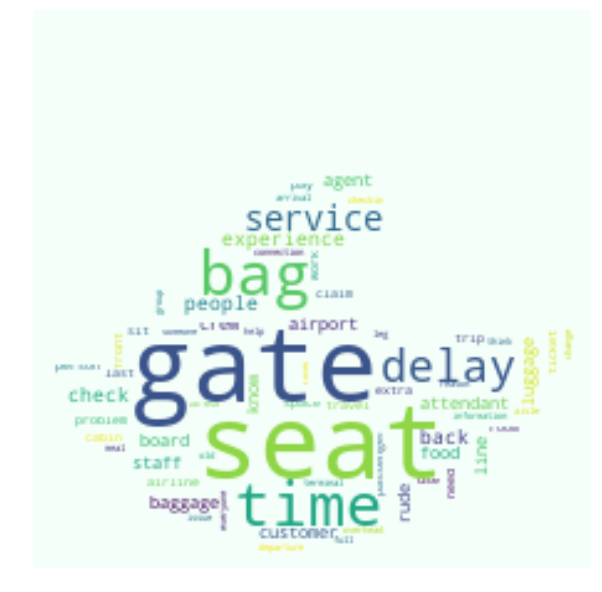

Enter the keyword: gate
saved file name: gate.csv


True

In [29]:
wordCloud(text)

keyword = input("Enter the keyword: ")
fileName = input("saved file name: ")

search = x.textMining(keyword,fileName)
search = search.drop(['index'], axis =1)
search

#creating html tabs
count = ""
outcome_html = ""

for index, row in search.iterrows():
    #print("<tr>"+ count +"<td>"+str(row['FLIGHT_NUMBER'])+"</td><td>"+str(row['ORIGIN_AIRPORT'])+"</td><td>"+str(row['DEST_AIRPORT'])+"</td><td>"+str(row['OVERALL_SATISFACTION_SCORE'])+"</td><td>"+str(row['NET_PROMOTER_SCORE'])+"</td><td>"+str(row['COMMENTS'])+"</td><td>"+str(row['SENTIMENT_VALUE'])+ "</td></tr>\n")
    outcome_html = outcome_html+"<tr>"+ count +"<td>"+str(row['FLIGHT_NUMBER'])+"</td><td>"+str(row['ORIGIN_AIRPORT'])+"</td><td>"+str(row['DEST_AIRPORT'])+"</td><td>"+str(row['OVERALL_SATISFACTION_SCORE'])+"</td><td>"+str(row['NET_PROMOTER_SCORE'])+"</td><td>"+str(row['COMMENTS'])+"</td><td>"+str(row['SENTIMENT_VALUE'])+ "</td></tr>\n"

#f = open('output.txt', encoding='utf-8', mode='w')
#f.write(outcome_html)
#f.close()

import webbrowser

f = open('/Users/united/Desktop/Britto/output/Text.html','w')

#textComments = f1.read()

message = """<!DOCTYPE html>
<html>
<head>
<style>
#customers {
    font-family: "Trebuchet MS", Arial, Helvetica, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

#customers td, #customers th {
    padding: 8px;
}

#customers tr:nth-child(even){background-color: #f2f2f2;}

#customers tr:hover {background-color: #ddd;}

#customers th {
    padding-top: 12px;
    padding-bottom: 12px;
    text-align: center;
    background-color: #4CAF50;
    color: white;
}
#customers p:hover {background-color: #ddd;}

</style>
<meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
</head>
<body>
<div class="w3-container">
<table id="customers" class="w3-table w3-striped w3-border">
<tr>
    <th>FLIGHT NUMBER</th>
    <th>ORIGIN AIRPORT</th>
    <th>DEST AIRPORT</th>
    <th>OVERALL SATISFACTION SCORE</th>
    <th>NET PROMOTER SCORE</th>
    <th>COMMENTS</th>
    <th>SENTIMENT VALUE</th>
</tr>"""+outcome_html+"""</table></div></body></html>"""

f.write(message)
f.close()

#Change path to reflect file location
filename = 'file:///Users/united/Desktop/Britto/output/'+'Text.html'
webbrowser.open_new_tab(filename)


In [30]:
search

,FLIGHT_NUMBER,ORIGIN_AIRPORT,DEST_AIRPORT,OVERALL_SATISFACTION_SCORE,NET_PROMOTER_SCORE,COMMENTS,SENTIMENT_VALUE
0,1251,ORD,EWR,3.0,9.0,Our gate was changed but we were not notified....,-0.8126
1,2145,BDL,EWR,2.0,1.0,The check in process was very unsatisfactory. ...,-0.9224
2,4457,DSM,EWR,2.0,0.0,"During the 5+ hour delay, there was no communi...",-0.9174
3,3927,BTV,EWR,1.0,4.0,Jet bridge in Newark was frozen and wouldn’t m...,-0.5719
4,5404,ORD,PBI,5.0,8.0,"Hard to check in terminal 1, leave from term.2...",-0.5849
5,3852,ORD,FNT,1.0,5.0,Communication to the consumer at the gate was ...,-0.5984
6,1820,BZN,ORD,4.0,4.0,Very disappointed that We had to pay additiona...,-0.6361
7,1666,IAH,EWR,1.0,3.0,My first name is two sepate words Mary Lou. Yo...,-0.6560
8,206,ORD,MCO,1.0,3.0,The flight was delayed 3+ hours and although I...,-0.8264
9,206,ORD,MCO,1.0,3.0,I asked a gate attendant about the status of t...,-0.6318


In [34]:
search.sort_values(by = ['FLIGHT_NUMBER','ORIGIN_AIRPORT'], ascending = [True,False])

,FLIGHT_NUMBER,ORIGIN_AIRPORT,DEST_AIRPORT,OVERALL_SATISFACTION_SCORE,NET_PROMOTER_SCORE,COMMENTS,SENTIMENT_VALUE
714,18,MXP,EWR,5.0,10.0,The Milan airport is a pain in the neck...you ...,-0.5106
834,19,EWR,MXP,1.0,1.0,"Baggage destroyed, rude person at gate, no int...",-0.8126
241,23,EWR,DUB,4.0,4.0,The flight was delayed and said a gate change ...,-0.8225
752,23,EWR,DUB,3.0,0.0,Your attendants at the check in and at the gat...,-0.8429
984,23,EWR,DUB,4.0,7.0,Very limited announcements from gate staff on ...,-0.5413
518,36,EWR,EDI,4.0,8.0,The seating was really tight. I am only 5'5 an...,-0.8536
474,40,EWR,FCO,4.0,7.0,One woman freaked out and was hysterical speak...,-0.8528
520,48,EWR,BOM,2.0,2.0,There were a couple of disappointments that we...,-0.8979
670,49,BOM,EWR,3.0,3.0,"Prior to boarding, arrangements at gate were h...",-0.8860
532,56,CDG,EWR,3.0,5.0,I was fuming that the security personnel at CD...,-0.5596
